<a href="https://colab.research.google.com/github/pablosoria7/Python/blob/main/Fred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs


In [ ]:
!pip install -U plotly
!pip install adjustText
!pip install numpy_financial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
from adjustText import adjust_text
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import RcParams
from matplotlib import font_manager as fm, rcParams
from cycler import cycler
import os

### STYLE
plt.style.use('/content/drive/MyDrive/my.mplstyle')
C=[
#    '#c6bfc5',
     '#c14f5d',
     '#082448',
    #  '#979da5',
    #  '#e8e6e8',
     '#329b7e'
    #  '#6b6c83'
   ]
C = [ C[i] for i in [0,2,1] ]
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=C)
import matplotlib.patheffects as pe

g4 = "#0A0A0A"
g8 = "#141414"
g16 = "#292929"
g20 = "#333333"
g24 = "#3D3D3D"
g32 = "#525252"
g40 = "#666666"
g48 = "#7A7A7A"
g56 = "#8F8F8F"
g64 = "#A3A3A3"
g68 = "#ADADAD"
g72 = "#B8B8B8"
g80 = "#CCCCCC"
g88 = "#E0E0E0"
g92 = "#EBEBEB"
g96 = "#F5F5F5"
g98 = "#fafafa"

### FONTS
bse = '/content/drive/My Drive/ttf/'
def Font(d, s=None):
    fpath = os.path.join(matplotlib.get_data_path(), d)
    return fm.FontProperties(fname=fpath, size=s)
title = Font(d=bse + 'M Ying Hei PRC W48 W7.ttf')
subtitle = Font(d=bse + 'Varta-Regular.ttf')
legend = Font(d=bse + 'News Gothic WGL W01 Regular.ttf', s=16)
ticks = Font(d=bse + 'Sirichana W31.ttf')

In [ ]:
def rec(rec_df, df_to_join): # x = DataFrame
    Start = x.loc[(x == 1) & (x.shift(1).fillna(0) == 0)].index
    End = x.loc[(x == 1) & (x.shift(-1) == 0)].index
    for i, j in zip(Start, End):
        if j >= df_to_join.index[0]:
            ax.axvspan(i, j, color=g92, zorder=0)

In [ ]:
sns.color_palette([])


[]

In [ ]:
def labels(df, cols, ax):
    texts = [ ax.text( df.index[-1], df[col].iloc[-1], col,
                  color=ax.lines[idx].get_color(), fontproperties=legend,
                  zorder=3
                  ) for idx, col in enumerate(cols) ]
    return texts
def path_e(text, ax):
    for i in range(len(ax.lines)):
        text[i].set_path_effects([pe.Stroke(linewidth=1.1, foreground=g96), pe.Normal()])

# Bonds

In [ ]:
import numpy_financial as npf

principal = 2000
annual_i = .06
period = 5
coupon_payment = .08 * principal

bond_price = - npf.pv(annual_i, period, coupon_payment, principal)
bond_price

2168.494551422629

In [ ]:
face_value = 10000
market_price = 9000
n = 4
coupon_payment = .05 * face_value
def YTM(c, f, p, n):
    ytm = ((c + (f-p)/n))/((f+p)/2)
    return str(round(ytm*100, 2)) + '%'
YTM(coupon_payment, face_value, market_price, n)

'7.89%'

# Data

In [ ]:
df = pdr.DataReader(['USREC', 'CPIAUCSL','STICKCPIM158SFRBATL' , 'DFII10', 'FEDFUNDS', 'DFF', 'DGS2', 'DGS10', 'DGS30'], 'fred', start='1950-12-01' )

In [ ]:
df

,USREC,CPIAUCSL,STICKCPIM158SFRBATL,DFII10,FEDFUNDS,DFF,DGS2,DGS10,DGS30
DATE,,,,,,,,,
1950-12-01,0.0,24.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-01,0.0,25.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-02-01,0.0,25.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-03-01,0.0,25.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-04-01,0.0,25.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-08-19,NaN,NaN,NaN,NaN,NaN,5.33,NaN,NaN,NaN
2023-08-20,NaN,NaN,NaN,NaN,NaN,5.33,NaN,NaN,NaN
2023-08-21,NaN,NaN,NaN,2.00,NaN,5.33,4.97,4.34,4.45


In [ ]:
i10_30 = df.loc[: ,['DGS10', 'DGS30']].dropna()
i10_30['Spread'] = i10_30.apply(lambda x: x.DGS30 - x.DGS10, axis=1)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(3, 1,
                    specs=[[{"rowspan": 2, "colspan": 1}],
                           [None],
                           [{}]
                           ],
                    horizontal_spacing=0.1,
                    vertical_spacing=0.01,
                    shared_xaxes=True)
# Add traces
fig.append_trace(
    go.Scatter(x=i10_30.index, y=i10_30.Spread, name='Spread', fill='tozeroy'),
    row=3, col=1
)
for i in i10_30.columns[:-1]:
    fig.add_trace(
        go.Scatter(x=i10_30.index, y=i10_30[i], name=i),
        row=1, col=1
    )
fig.update_layout(template='seaborn', margin={"r":0,"t":40,"l":0,"b":0}

                )
fig.show()

In [ ]:
x = df.USREC.dropna()

ten_two = df.loc[:, ['DGS2', 'DGS10']].dropna().resample('MS').last()
ten_two['spread'] = ten_two.apply(lambda x:(x.DGS10 - x.DGS2), axis=1)

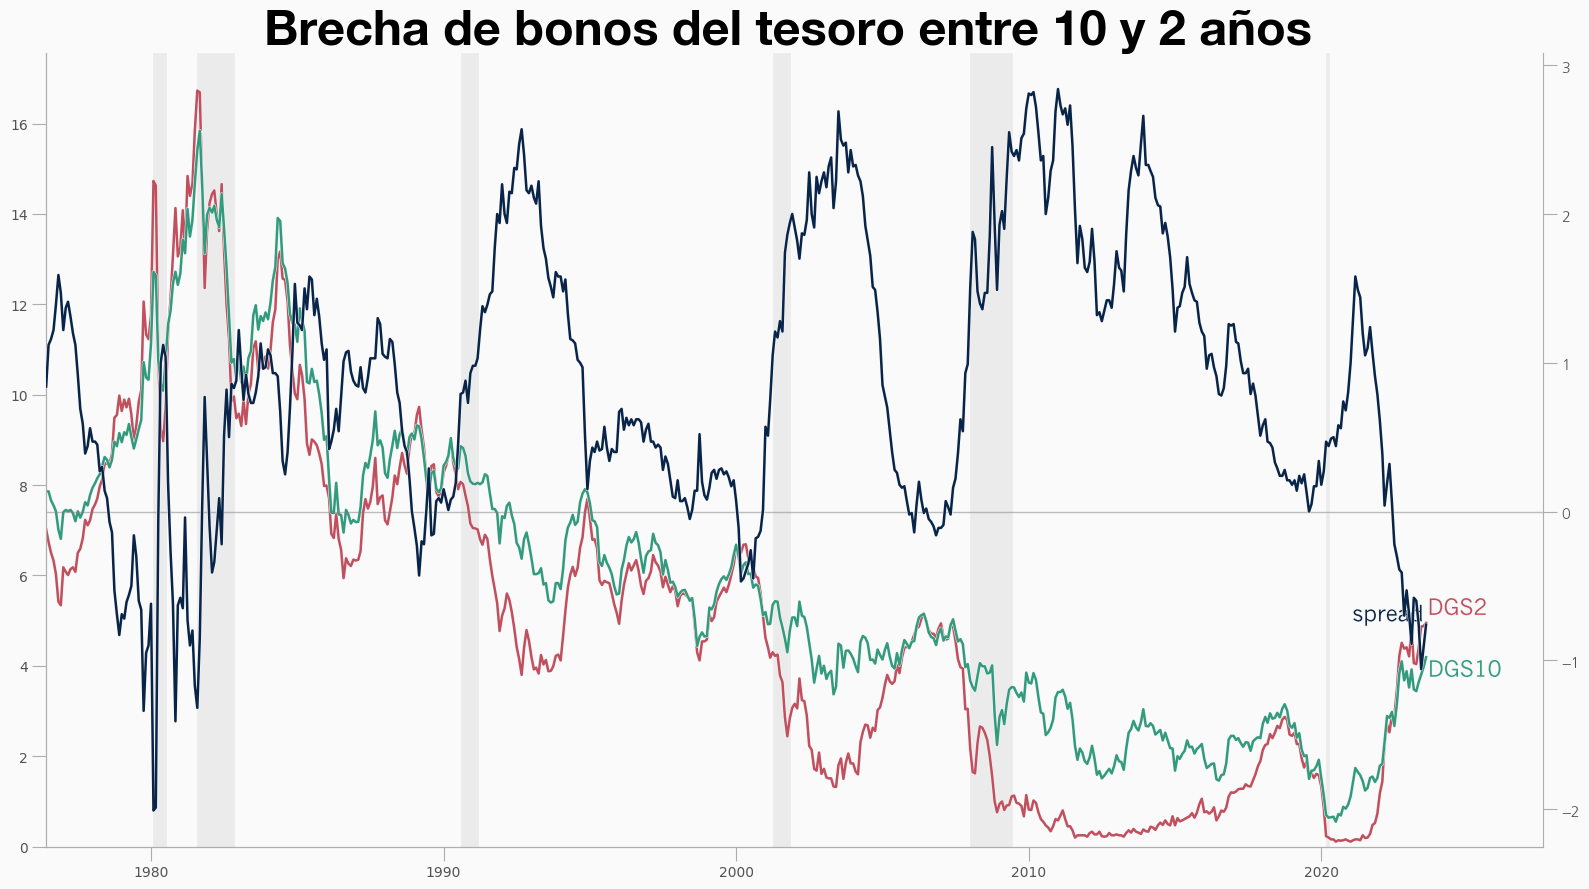

In [ ]:
path2 = [pe.Stroke(linewidth=2.5, foreground=g96), pe.Normal()]
### FIG
fig, ax = plt.subplots()
ax.plot(ten_two[['DGS2', 'DGS10']], zorder=2, path_effects=path2, lw=1.8)
ax2 = ax.twinx()
ax2.plot(ten_two.spread,c='#082448', zorder=4, path_effects=path2, lw=1.8)
rec(x, ten_two)
### LEGEND
ax.set_xlim(ten_two.index[0], ten_two.index[-1] + pd.DateOffset(years=4))
label = labels(ten_two, ten_two.iloc[:, :-1].columns, ax=ax)
label2 = labels(ten_two, [ten_two.iloc[:,-1].name], ax=ax2)
adjust_text( label + label2 )

path_e(label, ax)
path_e(label2, ax2)

### zero line
ax2.axhline(0, color='grey', alpha=.5, zorder=.4, lw=1)
### TICKS
ax.spines["right"].set_visible(True)
plt.xticks(rotation=0, fontproperties=ticks, fontsize=18)
plt.yticks(fontproperties=ticks, fontsize=18)
ax2.tick_params(axis="both", color=g68, length=6.5*1.5, which='major')
ax.tick_params(axis="both", color=g68, length=6.5*1.5, which='major')
ax.grid(False)
ax.set_ylim(0)
ax.set_title('Brecha de bonos del tesoro entre 10 y 2 años ',fontproperties=title, size=35)
fig.tight_layout()
fig.savefig('T10_T2.pdf', facecolor=fig.get_facecolor())

In [ ]:
ten_two.iloc[-1]

DGS2      4.95
DGS10     4.19
spread   -0.76
Name: 2023-08-01 00:00:00, dtype: float64

In [ ]:

df3 = pdr.DataReader(['CPIAUCSL', 'GS10'], 'fred', start='1965-12-01')# 'GS2', 'T10YIE']
df3.columns = ['cpi', 'i10']#, 'i2', 'break10']
break10 = pdr.DataReader(['T10YIE'], 'fred', start='1965-12-01')
break10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5386 entries, 2003-01-02 to 2023-08-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T10YIE  5167 non-null   float64
dtypes: float64(1)
memory usage: 84.2 KB


In [ ]:
cpi = df3.cpi
df3['MoM'] = cpi.pct_change(1)
df3['YoY'] = cpi.pct_change(12)
df3

,cpi,i10,MoM,YoY
DATE,,,,
1965-12-01,31.850,4.62,NaN,NaN
1966-01-01,31.880,4.61,0.000942,NaN
1966-02-01,32.080,4.83,0.006274,NaN
1966-03-01,32.180,4.87,0.003117,NaN
1966-04-01,32.280,4.75,0.003108,NaN
...,...,...,...,...
2023-03-01,301.808,3.66,0.000530,0.049869
2023-04-01,302.918,3.46,0.003678,0.049572
2023-05-01,303.294,3.57,0.001241,0.041288


In [ ]:
from scipy.stats import gmean
bk10 = break10.dropna()/100
bk10MoM = bk10.resample('MS').mean()
bk10MoM

,T10YIE
DATE,
2003-01-01,0.017543
2003-02-01,0.019126
2003-03-01,0.018629
2003-04-01,0.017748
2003-05-01,0.016610
...,...
2023-04-01,0.022665
2023-05-01,0.022136
2023-06-01,0.022005


In [ ]:
# bk10MoM.index = bk10MoM.index - pd.offsets.MonthBegin(1) #Restar los dias para obtener el primer dia del mes
dfj = df3.join(bk10MoM).dropna()#, how='inner', left_index=True, right_index=True)


In [ ]:
dfj

,cpi,i10,MoM,YoY,T10YIE
DATE,,,,,
2003-01-01,182.600,4.05,0.004400,0.027575,0.017543
2003-02-01,183.600,3.90,0.005476,0.031461,0.019126
2003-03-01,183.900,3.81,0.001634,0.030252,0.018629
2003-04-01,183.200,3.96,-0.003806,0.021751,0.017748
2003-05-01,182.900,3.57,-0.001638,0.018942,0.016610
...,...,...,...,...,...
2023-03-01,301.808,3.66,0.000530,0.049869,0.023022
2023-04-01,302.918,3.46,0.003678,0.049572,0.022665
2023-05-01,303.294,3.57,0.001241,0.041288,0.022136


In [ ]:
#@title
# base = '1976-06-01'
# z = df3.cpi[0]#Periodo base
# date = df3.cpi.index[0].strftime('%Y-%m')
# df3[f'cpi_{date}=100'] = df3.cpi.apply(lambda x: x/z)
# df3

In [ ]:
dfj['r10_post'] = dfj.apply(lambda x: ((x.i10/100)-x.MoM)/(1+x.MoM), axis=1)
dfj['r10_ante'] = dfj.apply(lambda x: ((x.i10/100)-x.T10YIE)/(1+x.T10YIE), axis=1)
fig = px.line(dfj[['r10_post', 'r10_ante']]*100,
        template='seaborn')
fig.update_layout(yaxis_tickformat = '.5',
                   margin=dict(l=0, r=0, t=0, b=0))
fig.show()

In [ ]:
df3.MoM*100

DATE
1965-12-01         NaN
1966-01-01    0.094192
1966-02-01    0.627353
1966-03-01    0.311721
1966-04-01    0.310752
                ...   
2023-03-01    0.053042
2023-04-01    0.367783
2023-05-01    0.124126
2023-06-01    0.180353
2023-07-01    0.166864
Name: MoM, Length: 692, dtype: float64

In [ ]:
df3yoy = df3.cpi.dropna().pct_change(12)
px.line(round(df3yoy*100, 1))

In [ ]:
df3.cpi.isna().sum()

0

# Riqueza Us

In [ ]:
import requests, io, zipfile

W_url = 'https://www.federalreserve.gov/releases/z1/dataviz/download/zips/dfa.zip'
r = requests.get(W_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
filesList = [x.filename for x in z.infolist()]
filesList

['dfa-data-definitions.txt',
 'dfa-generation-levels.csv',
 'dfa-generation-shares.csv',
 'dfa-education-levels.csv',
 'dfa-education-shares.csv',
 'dfa-income-levels.csv',
 'dfa-income-shares.csv',
 'dfa-networth-levels.csv',
 'dfa-networth-shares.csv',
 'dfa-race-levels.csv',
 'dfa-race-shares.csv',
 'dfa-age-levels.csv',
 'dfa-age-shares.csv',
 'dfa-general-levels-detail-dictionary.txt',
 'dfa-general-shares-detail-dictionary.txt',
 'dfa-generation-levels-detail.csv',
 'dfa-generation-shares-detail.csv',
 'dfa-education-levels-detail.csv',
 'dfa-education-shares-detail.csv',
 'dfa-income-levels-detail.csv',
 'dfa-income-shares-detail.csv',
 'dfa-networth-levels-detail.csv',
 'dfa-networth-shares-detail.csv',
 'dfa-race-levels-detail.csv',
 'dfa-race-shares-detail.csv',
 'dfa-age-levels-detail.csv',
 'dfa-age-shares-detail.csv']

In [ ]:
Wdf = pd.read_csv(z.open('dfa-income-shares.csv'))
Wdf

,Date,Category,Net worth,Assets,Real estate,Consumer durables,Corporate equities and mutual fund shares,DB pension entitlements,DC pension entitlements,Private businesses,Other assets,Liabilities,Home mortgages,Consumer credit,Other liabilities,share
0,1989:Q3,pct99to100,16.6,14.9,7.8,14.0,35.9,2.6,10.2,28.1,18.1,4.6,4.1,3.5,16.3,10.228515
1,1989:Q3,pct80to99,44.0,44.5,44.1,37.0,44.4,44.9,60.4,48.4,42.1,47.7,52.3,32.3,59.9,60.395313
2,1989:Q3,pct60to80,16.7,18.0,20.4,22.7,10.8,25.2,15.2,9.3,16.6,26.2,25.6,30.9,12.0,15.235213
3,1989:Q3,pct40to60,12.4,12.6,14.5,13.2,5.8,17.8,7.8,8.3,12.3,13.5,11.7,20.3,4.2,7.793929
4,1989:Q3,pct20to40,7.5,7.3,9.7,9.1,2.0,6.5,5.5,4.3,8.0,6.0,5.1,8.9,3.7,5.519096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,2023:Q1,pct80to99,44.9,44.6,44.0,34.0,42.6,47.9,60.1,40.9,44.4,42.1,48.9,27.0,28.6,60.123595
806,2023:Q1,pct60to80,14.7,15.8,19.0,22.1,8.3,28.9,19.1,7.1,13.9,23.5,22.8,28.3,10.0,19.066424
807,2023:Q1,pct40to60,7.2,8.0,11.6,16.0,2.3,13.5,7.9,2.4,7.6,14.1,12.0,21.5,5.6,7.892557
808,2023:Q1,pct20to40,3.8,4.4,7.3,10.1,1.3,5.1,1.9,1.1,4.9,8.5,6.1,15.2,5.6,1.883374


In [ ]:
Wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       810 non-null    object 
 1   Category                                   810 non-null    object 
 2   Net worth                                  810 non-null    float64
 3   Assets                                     810 non-null    float64
 4   Real estate                                810 non-null    float64
 5   Consumer durables                          810 non-null    float64
 6   Corporate equities and mutual fund shares  810 non-null    float64
 7   DB pension entitlements                    810 non-null    float64
 8   DC pension entitlements                    810 non-null    float64
 9   Private businesses                         810 non-null    float64
 10  Other assets              

In [ ]:
Wdf = Wdf.pivot_table(index=['Date', 'Category'], values=Wdf.iloc[2:].columns)
Wdf

Assets  Consumer credit  Consumer durables  \
Date    Category                                                 
1989:Q3 pct00to20      2.8              4.2                4.0   
        pct20to40      7.3              8.9                9.1   
        pct40to60     12.6             20.3               13.2   
        pct60to80     18.0             30.9               22.7   
        pct80to99     44.5             32.3               37.0   
...                    ...              ...                ...   
2023:Q1 pct20to40      4.4             15.2               10.1   
        pct40to60      8.0             21.5               16.0   
        pct60to80     15.8             28.3               22.1   
        pct80to99     44.6             27.0               34.0   
        pct99to100    24.2              1.1               11.4   

                    Corporate equities and mutual fund shares  \
Date    Category                                                
1989:Q3 pct00to20                                         1.1   
        pct20to40                                         2.0   
        pct40to60                                         5.8   
        pct60to80                                        10.8   
        pct80to99                                        44.4   
...                                                       ...   
2023:Q1 pct20to40                                         1.3   
        pct40to60                                         2.3   
        pct60to80                                         8.3   
        pct80to99                                        42.6   
        pct99to100                                       44.2   

                    DB pension entitlements  DC pension entitlements  \
Date    Category                                                       
1989:Q3 pct00to20                       3.1                      0.8   
        pct20to40                       6.5                      5.5   
        pct40to60                      17.8                      7.8   
        pct60to80                      25.2                     15.2   
        pct80to99                      44.9                     60.4   
...                                     ...                      ...   
2023:Q1 pct20to40                       5.1                      1.9   
        pct40to60                      13.5                      7.9   
        pct60to80                      28.9                     19.1   
        pct80to99                      47.9                     60.1   
        pct99to100                      2.9                     10.6   

                    Home mortgages  Liabilities  Net worth  Other assets  \
Date    Category                                                           
1989:Q3 pct00to20              1.1          2.0        2.9           2.8   
        pct20to40              5.1          6.0        7.5           8.0   
        pct40to60             11.7         13.5       12.4          12.3   
        pct60to80             25.6         26.2       16.7          16.6   
        pct80to99             52.3         47.7       44.0          42.1   
...                            ...          ...        ...           ...   
2023:Q1 pct20to40              6.1          8.5        3.8           4.9   
        pct40to60             12.0         14.1        7.2           7.6   
        pct60to80             22.8         23.5       14.7          13.9   
        pct80to99             48.9         42.1       44.9          44.4   
        pct99to100             6.9          7.8       26.3          25.3   

                    Other liabilities  Private businesses  Real estate  \
Date    Category                                                         
1989:Q3 pct00to20                 3.9                 1.6          3.5   
        pct20to40                 3.7                 4.3          9.7   
        pct40to60                 4.2                 8.3         14.5   
        pct60to80  

In [ ]:
assets = ['Real estate', 'Consumer durables',
       'Corporate equities and mutual fund shares','DB pension entitlements', 'Private businesses',
       'Other assets']
Wdf22q1 = Wdf.xs('2022:Q1', 0, 0)
px.bar(Wdf22q1.loc[:, assets].T)

In [ ]:
incomeLvls = pd.read_csv(z.open('dfa-income-levels.csv')).pivot_table(index=['Date', 'Category'])
incomeLvls

Assets  Consumer credit  Consumer durables  \
Date    Category                                                   
1989:Q3 pct00to20     656610            32718              75636   
        pct20to40    1716204            69862             172195   
        pct40to60    2961795           159518             250961   
        pct60to80    4236244           241982             429524   
        pct80to99   10479241           252993             701742   
...                      ...              ...                ...   
2023:Q1 pct20to40    6921009           727949             783131   
        pct40to60   12758853          1026551            1243021   
        pct60to80   25043229          1353815            1707852   
        pct80to99   70880872          1290471            2635124   
        pct99to100  38436012            50542             885656   

                    Corporate equities and mutual fund shares  \
Date    Category                                                
1989:Q3 pct00to20                                       23160   
        pct20to40                                       40817   
        pct40to60                                      118515   
        pct60to80                                      221461   
        pct80to99                                      912959   
...                                                       ...   
2023:Q1 pct20to40                                      466762   
        pct40to60                                      838249   
        pct60to80                                     2971542   
        pct80to99                                    15257700   
        pct99to100                                   15828989   

                    DB pension entitlements  DC pension entitlements  \
Date    Category                                                       
1989:Q3 pct00to20                    108522                     8344   
        pct20to40                    227011                    55622   
        pct40to60                    618700                    78548   
        pct60to80                    874792                   153542   
        pct80to99                   1560127                   608670   
...                                     ...                      ...   
2023:Q1 pct20to40                    950400                   228940   
        pct40to60                   2512058                   959407   
        pct60to80                   5369678                  2317685   
        pct80to99                   8885706                  7308531   
        pct99to100                   538481                  1289217   

                    Home mortgages  Liabilities  Net worth  Other assets  \
Date    Category                                                           
1989:Q3 pct00to20            24496        63307     593304        150059   
        pct20to40           113475       189163    1527041        423236   
        pct40to60           259057       425150    2536644        650133   
        pct60to80           566066       826656    3409588        873943   
        pct80to99          1156633      1502756    8976485       2221233   
...                            ...          ...        ...           ...   
2023:Q1 pct20to40           767489      1553938    5367070       1283676   
        pct40to60          1502980      2587856   10170997       2005678   
        pct60to80          2855743      4314226   20729003       3660917   
        pct80to99          6126425      7716854   63164018      11719173   
        pct99to100          869469      1427383   37008628       6681449   

                    Other liabilities  Private businesses  Real estate  
Date    Category                                                        
1989:Q3 pct00to20                6093               47601       243288  
        pct20to40                5826              127812       669511  
        pct40to60                6575              245217       999721  


In [ ]:
all_dfs = {}
for i, j in enumerate(incomeLvls.index.get_level_values(0).unique()):
    income = incomeLvls.xs(j, 0, 0)
    activos = income.loc[:,assets].apply(lambda x: x/x.sum(), axis=1)
    all_dfs[i] = activos
df_inc = pd.concat([all_dfs[x] for x, y in enumerate(all_dfs)])
df_inc

,Real estate,Consumer durables,Corporate equities and mutual fund shares,DB pension entitlements,Private businesses,Other assets
Category,,,,,,
pct00to20,0.375290,0.116674,0.035726,0.167404,0.073428,0.231478
pct20to40,0.403179,0.103696,0.024580,0.136706,0.076968,0.254872
pct40to60,0.346734,0.087041,0.041105,0.214584,0.085049,0.225486
pct60to80,0.344654,0.105206,0.054244,0.214268,0.067569,0.214060
pct80to99,0.307664,0.071094,0.092493,0.158058,0.145654,0.225036
...,...,...,...,...,...,...
pct20to40,0.452072,0.117024,0.069749,0.142019,0.027316,0.191820
pct40to60,0.405892,0.105346,0.071041,0.212896,0.034844,0.169981
pct60to80,0.343735,0.075151,0.130758,0.236284,0.052980,0.161093


In [ ]:
fig = px.bar(df_inc, animation_frame=incomeLvls.index.get_level_values(0) )
fig.show()

In [ ]:
pasivos = income.loc[:,['Consumer credit', 'Home mortgages', 'Other liabilities']]
pasivos_pct = pasivos.apply(lambda x: x/x.sum(), axis=1)
px.bar(pasivos_pct.loc[pasivos.index[::-1]], title='Pasivos')

In [ ]:
income_100 = income.apply(lambda x: x/x.sum(), axis=1)
income

,Assets,Consumer credit,Consumer durables,Corporate equities and mutual fund shares,DB pension entitlements,DC pension entitlements,Home mortgages,Liabilities,Net worth,Other assets,Other liabilities,Private businesses,Real estate
Category,,,,,,,,,,,,,
pct00to20,4891274,328085,490557,457344,312460,52065,397561,746415,4144858,1041620,20769,359143,2178084
pct20to40,6921009,727949,783131,466762,950400,228940,767489,1553938,5367070,1283676,58500,182803,3025297
pct40to60,12758853,1026551,1243021,838249,2512058,959407,1502980,2587856,10170997,2005678,58325,411142,4789298
pct60to80,25043229,1353815,1707852,2971542,5369678,2317685,2855743,4314226,20729003,3660917,104668,1203997,7811558
pct80to99,70880872,1290471,2635124,15257700,8885706,7308531,6126425,7716854,63164018,11719173,299958,6976277,18098362
pct99to100,38436012,50542,885656,15828989,538481,1289217,869469,1427383,37008628,6681449,507372,7936678,5275542


In [ ]:
incDetail = pd.read_csv(z.open('dfa-income-levels-detail.csv')).pivot_table(index=['Date', 'Category'])
incDetail

Annuities    Assets  Consumer credit  Consumer durables  \
Date    Category                                                              
1989:Q3 pct00to20        1207    656610            32718              75636   
        pct20to40        6555   1716204            69862             172195   
        pct40to60       39243   2961795           159518             250961   
        pct60to80       72493   4236244           241982             429524   
        pct80to99      195236  10479241           252993             701742   
...                       ...       ...              ...                ...   
2023:Q1 pct20to40       44219   6921009           727949             783131   
        pct40to60      260301  12758853          1026551            1243021   
        pct60to80      683923  25043229          1353815            1707852   
        pct80to99     1332760  70880872          1290471            2635124   
        pct99to100      31552  38436012            50542             885656   

                    Corporate and foreign bonds  \
Date    Category                                  
1989:Q3 pct00to20                          1241   
        pct20to40                          1265   
        pct40to60                         15491   
        pct60to80                         31134   
        pct80to99                         29388   
...                                         ...   
2023:Q1 pct20to40                             0   
        pct40to60                             0   
        pct60to80                             0   
        pct80to99                             0   
        pct99to100                            0   

                    Corporate equities and mutual fund shares  \
Date    Category                                                
1989:Q3 pct00to20                                       23160   
        pct20to40                                       40817   
        pct40to60                                      118515   
        pct60to80                                      221461   
        pct80to99                                      912959   
...                                                       ...   
2023:Q1 pct20to40                                      466762   
        pct40to60                                      838249   
        pct60to80                                     2971542   
        pct80to99                                    15257700   
        pct99to100                                   15828989   

                    DB pension entitlements  DC pension entitlements  \
Date    Category                                                       
1989:Q3 pct00to20                    108522                     7137   
        pct20to40                    227011                    49067   
        pct40to60                    618700                    39305   
        pct60to80                    874792                    81049   
        pct80to99                   1560127                   413434   
...                                     ...                      ...   
2023:Q1 pct20to40                    950400                   184721   
        pct40to60                   2512058                   699106   
        pct60to80                   5369678                  1633762   
        pct80to99                   8885706                  5975771   
        pct99to100                   538481                  1257665   

                    Debt securities  \
Date    Category                      
1989:Q3 pct00to20              9257   
        pct20to40             38372   
        pct40to60             91079   
        pct60to80            146751   
        pct80to99            462387   
...                             ...   
2023:Q1 pct20to40            137836   
        pct40to60            283102   
        pct60to80            679412   
        pct80to99           2157326   
        pct99to100          1581570   

                    Deferred and unpa

In [ ]:
incDetail.iloc[0]

Annuities                                          1207.0
Assets                                           656610.0
Consumer credit                                   32718.0
Consumer durables                                 75636.0
Corporate and foreign bonds                        1241.0
Corporate equities and mutual fund shares         23160.0
DB pension entitlements                          108522.0
DC pension entitlements                            7137.0
Debt securities                                    9257.0
Deferred and unpaid life insurance premiums         530.0
Depository institutions loans n.e.c.                154.0
Deposits                                         113785.0
Equity in noncorporate business                   47601.0
Financial assets                                 337686.0
Home mortgages                                    24496.0
Household count                                18593339.0
Liabilities                                       63307.0
Life insurance

In [ ]:
import itertools
numbers = incDetail.iloc[0].drop(['Assets', 'Liabilities',
            'Net worth', 'Loans (Liabilities)',
             'Maximum Income Cutoff',
'Minimum Income Cutoff','Other loans and advances (Liabilities)']).tolist()
target = incDetail.iloc[0][0]
result = [seq for i in range(len(numbers), 0, -1)
        for seq in itertools.combinations(numbers, i)
        if sum(seq) == target]

In [ ]:
lt2 = []
for x in range(len(result)):
    lt = [incDetail.iloc[0][incDetail.iloc[0]==i].keys().tolist() for i in result[x]]
    flat_lt = [item for sublist in lt for item in sublist]
    lt2.append(flat_lt)
    print(flat_lt)

['Annuities']


In [ ]:
l = lt2[::-1][:4]
for i, j in enumerate(l):

    # print(set(l[i]) & set(l[i+1]))
    if i < len(l)-1:
        a = l[i]
        b = l[i+1]
        ls = []
        inter = [z for z in a if z in b]
        ls.append(inter)

        # print('--',inter)
        value = set(b) - set(inter)
        l1 = [{x:list(value)} for x in a if x not in b]
        # print(list(set(l[i]) & set([i+1])))
        print(l1)

In [ ]:
print(l)

[['Annuities']]


In [ ]:
result = [seq for i in range(len(numbers), 0, -1)
        for seq in itertools.combinations(numbers, i)
        if sum(seq) == incDetail.loc[incDetail.iloc[0].name, 'Financial assets'] ]
result

KeyboardInterrupt: ignored

In [ ]:
incDetail.loc[incDetail.iloc[0].name, 'Financial assets']

In [ ]:
oecd_cpi = pd.read_csv('https://stats.oecd.org/sdmx-json/data/DP_LIVE/.CPI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en')
oecd_cpi

In [ ]:
oecd_cpi.info()

In [ ]:
for i in oecd_cpi.columns:
    print(str(i), oecd_cpi[i].unique())

In [ ]:
all_loc = oecd_cpi[(oecd_cpi.FREQUENCY == 'M') & (oecd_cpi.SUBJECT == 'TOT') & (oecd_cpi.MEASURE == 'IDX2015')]
all_loc =  all_loc.pivot_table(index=['TIME'], columns=['LOCATION'], values='Value')
all_loc.index = pd.to_datetime(all_loc.index)
# ax.plot(g7['G-7'].pct_change(12).dropna() )
allYoY = all_loc.pct_change(12).dropna()
allYoY.iloc[:, (allYoY.std()).argsort()].plot(kind='box')